# The BWW Project

#### Project to test the hypothesis that neighborhoods are better where BWWs are built
#### Buffalo Wild Wings Franchise Info: https://en.wikipedia.org/wiki/Buffalo_Wild_Wings
#### Buffalo Wild Wings Location Info: https://www.yellowpages.com
#### Niche Data Example: https://www.niche.com/places-to-live/z/11762/
#### Zip Codes Dataset: https://www.aggdata.com/node/86

In [1]:
# Import libraries

import requests ##a library for getting the html from a url
from bs4 import BeautifulSoup as bs ##helpful library for parsing and searching html/xml
import pandas as pd

In [4]:
states = {'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'}

In [5]:
# Loading data for first page of all states to dataframe

infoList = []
# df = pd.DataFrame()
for state in states:
    url = 'https://www.yellowpages.com/search?search_terms=buffalo+wild+wings&geo_location_terms=' + state
    x = requests.get(url)
    # x.content
    soup = bs(x.text, 'html.parser')
    # soup.body
    locations = soup.body.findAll('div', {'class' : 'info'})
    
    for location in locations:
        try:
            name = location.findAll('span', {'itemprop': 'name'})[0].text.strip()
            adr = location.findAll('span', {'class': 'street-address'})[0].text.strip()
            city = location.findAll('span', {'class': 'locality'})[0].text.strip().replace(',','')
            state = location.findAll('span', {'itemprop': 'addressRegion'})[0].text.strip()
            postalCode = location.findAll('span', {'itemprop': 'postalCode'})[0].text.strip()
            telephone = location.findAll('div', {'itemprop': 'telephone'})[0].text.strip()
            info = [name, adr, city, state, postalCode, telephone]
            infoList.append(info)
        except:
            pass

In [6]:
# Loading data for all other pages of all states to dataframe. Guesstimating 5 maximum.

for state in states:
    for i in list(range(2,6)):
        try:
            url = 'https://www.yellowpages.com/search?search_terms=buffalo+wild+wings&geo_location_terms=' + state + '&page=' + str(i)
            x = requests.get(url)
            # x.content
            soup = bs(x.text, 'html.parser')
            # soup.body
            locations = soup.body.findAll('div', {'class' : 'info'})

            for location in locations:
                try:
                    name = location.findAll('span', {'itemprop': 'name'})[0].text.strip()
                    adr = location.findAll('span', {'class': 'street-address'})[0].text.strip()
                    city = location.findAll('span', {'class': 'locality'})[0].text.strip().replace(',','')
                    state = location.findAll('span', {'itemprop': 'addressRegion'})[0].text.strip()
                    postalCode = location.findAll('span', {'itemprop': 'postalCode'})[0].text.strip()
                    telephone = location.findAll('div', {'itemprop': 'telephone'})[0].text.strip()
                    info = [name, adr, city, state, postalCode, telephone]
                    infoList.append(info)
                except:
                    pass    
        except:
            pass

In [7]:
# Create DataFrame, drop duplicates, remove outliers, explore outliers, reset index

df = pd.DataFrame(infoList, columns = ['Name', 'Address', 'City', 'State', 'Postal Code', 'Telephone']).drop_duplicates()
dfoutliers = df.loc[df['Name']!='Buffalo Wild Wings']
df = df.loc[df['Name']=='Buffalo Wild Wings'] # Filter for only BWW restaurants
df = df.reset_index(drop=True)
dfoutliers
# TODO: filter out addresses with two phone numbers
# TODO (maybe): include BWW locations with longer legitimate titles ("Buffalo Wild Wings Grill & Bar")

# Below: displaying OUTLIERS ONLY

,Name,Address,City,State,Postal Code,Telephone
135,Buffalo Wild Wings - Boise,777 W Main St Ste 130,Boise,ID,83702,(208) 429-6355
184,Wild Buffalo House Of Music,208 W Holly St,Bellingham,WA,98225,(360) 746-8733
243,Buffalo Wild Wings Grill & Bar,6341 Airport Blvd,Mobile,AL,36608,(251) 378-5955
262,Buffalo Wild Wings Grill & Bar,7020 Carpenter Rd,Skokie,IL,60077,(847) 329-9333
264,Buffalo Wild Wings Grill & Bar,500 E Rollins Rd,Round Lake Beach,IL,60073,(815) 669-9817
276,Buffalo Wild Wings Grill & Bar,7020 Carpenter Rd,Skokie,IL,60077,(779) 220-2732
483,Wild West Buffalo Jerky,9218 S 700 E,Sandy,UT,84070,(801) 568-0552
609,Buffalo Wild Wings Inc,5500 Wayzata Blvd Ste 1600,Minneapolis,MN,55416,(952) 593-9943
753,Buffalo Wild Wings Grill & Bar,127 East Palm Avenue,Burbank,CA,91502,(818) 524-2373
863,Buffalo Bills Wild West Grill - CLOSED,1686 Main St,Southaven,MS,38671,(662) 470-6549


In [8]:
# Create empty columns for all niche.com grades

def getNicheColumns(df):
    nicheColumns = ['Overall Niche Grade', 'Public Schools', 'Crime & Safety', 'Housing', 'Nightlife', 
              'Good for Families', 'Diversity', 'Jobs', 'Weather', 'Cost of Living', 'Health & Fitness',
              'Outdoor Activities', 'Commute']
    df = pd.concat([df, pd.DataFrame(columns=nicheColumns)], axis=1)
    return df

In [9]:
# Load grade data from niche.com to dataframe

def scrape_niche(df):
    nicheData = []
    for index, row in df.iterrows():
        # Display progress
        if (index%round(len(df)*.05)==0):
            print(str(round(float(index)/len(df)*100)) + '%')
        postalCode = row['Postal Code']
#         print(postalCode)
        url = 'https://www.niche.com/places-to-live/z/' + postalCode + '/'
        x = requests.get(url)
        soup = bs(x.text, 'html.parser')
        try:
            overall_grade = soup.body.findAll('div', {'class': 'overall-grade__niche-grade'})[0].text
            df.iloc[index]['Overall Niche Grade'] = overall_grade
            nicheData.append(overall_grade)
#             print('Overall Grade: ' + overall_grade)
        except:
            df.iloc[index]['Overall Niche Grade'] = None
            pass
        reportcard = soup.body.findAll('div', {'class': 'report-card'})
        reportcard = soup.body.findAll('div', {'class': 'profile-grade--two'})
        grades = []
        for div in reportcard:
            try:
                children = div.findChildren()
                label = children[0].text
                grade = children[1].text
                grades.append(grade)
#                 print(label + ': ' + grade)
                df.iloc[index][label] = grade
            except:
                pass
    print('Done!')
    return(df)

In [10]:
df = getNicheColumns(df)
df = scrape_niche(df)
df.head()

0%
5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%
64%
69%
74%
79%
84%
89%
94%
99%
Done!


,Name,Address,City,State,Postal Code,Telephone,Overall Niche Grade,Public Schools,Crime & Safety,Housing,Nightlife,Good for Families,Diversity,Jobs,Weather,Cost of Living,Health & Fitness,Outdoor Activities,Commute
0,Buffalo Wild Wings,7030 W 105th St,Overland Park,KS,66212,(913) 341-9464,A+,A,B,A-,A,A+,B+,A-,B,B+,A+,A-,B
1,Buffalo Wild Wings,3236 N Rock Rd Ste 190,Wichita,KS,67226,(316) 636-9464,A,C+,C,B,A-,B,A-,A-,B+,B+,B+,C+,B
2,Buffalo Wild Wings,1918 N Rock Rd,Derby,KS,67037,(316) 788-9464,A,B,C,A-,A-,A-,B,A-,B+,A-,A-,B,B+
3,Buffalo Wild Wings,12110 S Strang Line Rd,Olathe,KS,66062,(913) 393-0638,A+,A,B,A,A-,A+,B+,A,B,B+,A,A-,A-
4,Buffalo Wild Wings,1231 Moro St,Manhattan,KS,66502,(785) 323-9464,A+,A,NG,B,A,A+,B+,B,B,B,A,B+,A


In [11]:
# Write data to CSV and JSON

# df.to_csv('BuffaloWildWings.csv')
# df.to_json('BuffaloWildWings.json', orient="records")

In [12]:
# Plot it!

import matplotlib.pyplot as plt
overallGradeCounts = df['Overall Niche Grade'].value_counts()
overallGradeCounts.plot(kind='bar')
plt.show()

In [13]:
# Load and clean zip code data from aggdata.com

usZipCodes = pd.read_csv('us_postal_codes.csv', dtype={'Zip Code': str})
usZipCodes = usZipCodes.drop(['State','County','Latitude','Longitude'], axis=1)
usZipCodes.columns = ['Postal Code', 'City', 'State']
# usZipCodes.head()

distinctZipCodes = usZipCodes.loc[~usZipCodes['Postal Code'].isin(df['Postal Code'])].reset_index(drop=True)
distinctZipCodes.head()

,Postal Code,City,State
0,00501,Holtsville,NY
1,00544,Holtsville,NY
2,01001,Agawam,MA
3,01002,Amherst,MA
4,01003,Amherst,MA


In [15]:
# Pull in the same amount of random zip codes as there are zip codes in our BWW database

import random

# Take 1.5 times the amount of data as in BWW to account for zip codes niche.com hasn't reported on yet
# They will generate null rows, which we will need to remove
distinctZipIndexArray = random.sample(range(1, len(distinctZipCodes)), round(len(df)*1.5))
# distinctZipIndexArray = random.sample(range(1, len(distinctZipCodes)), 10)   # for testing

distinctZipCodes2 = getNicheColumns(distinctZipCodes.iloc[distinctZipIndexArray].reset_index(drop=True))
distinctZipCodes2 = scrape_niche(distinctZipCodes2)
distinctZipCodes2.head()

0%
5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%
65%
70%
75%
80%
85%
90%
95%
Done!


,Postal Code,City,State,Overall Niche Grade,Public Schools,Crime & Safety,Housing,Nightlife,Good for Families,Diversity,Jobs,Weather,Cost of Living,Health & Fitness,Outdoor Activities,Commute
0,54919,Appleton,WI,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91610,Toluca Lake,CA,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,69346,Harrison,NE,B+,B-,NG,A,C,B+,B-,A-,NG,A,C,C,B+
3,79226,Clarendon,TX,B+,A-,NG,A,B-,B,B,A-,B+,A,B-,D,B
4,80135,Sedalia,CO,B+,B+,B+,C+,B+,B+,C+,A,C+,C,A+,B,C+


In [16]:
# Remove null rows and write to CSV and JSON

distinctZipCodes3 = distinctZipCodes2[~distinctZipCodes2['Overall Niche Grade'].isnull()].iloc[0:len(df)]
len(distinctZipCodes3)
# distinctZipCodes3[distinctZipCodes3['Postal Code']=='44679']['Diversity']
# distinctZipCodes3.to_csv('USNicheGradeSample.csv')
# distinctZipCodes3.to_json('USNicheGradeSample.json', orient="records")

1210

In [17]:
# Plot it!

import matplotlib.pyplot as plt
gradesOrder = ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F']
# mapping = {day: i for i, day in enumerate(gradesOrder)}
# key = distinctZipCodes3['Overall Niche Grade'].map(mapping)
# distinctZipCodes3.iloc[key.argsort()]
distinctOverallGradeCounts = distinctZipCodes3['Overall Niche Grade'].value_counts()
distinctOverallGradeCounts.plot(kind='bar')
plt.show()

## Start here if you're lazy and don't want to run all that code up there again!

In [2]:
usNicheGradesSample = pd.read_csv('USNicheGradeSample.csv').drop('Unnamed: 0', axis=1)
bwwdata = pd.read_csv('BuffaloWildWings.csv').drop('Unnamed: 0', axis=1)
usNicheGradesSample.head()

,Postal Code,City,State,Overall Niche Grade,Public Schools,Crime & Safety,Housing,Nightlife,Good for Families,Diversity,Jobs,Weather,Cost of Living,Health & Fitness,Outdoor Activities,Commute
0,29592,Sellers,SC,C+,C,C-,A,C,C+,A-,B-,A,A+,C-,C+,C-
1,17954,Minersville,PA,B-,C,B,B-,A,C+,C+,C,B-,B+,B-,B-,B+
2,32092,Saint Augustine,FL,A,A,C,A-,B+,A,B,A,A-,B-,A-,B,B-
3,32544,Hurlburt Field,FL,B-,A-,C+,C-,C+,B+,B,C,B-,C+,C+,B+,A
4,18333,Kresgeville,PA,B-,B,B,B,A-,B-,B+,C+,C+,B,B,B+,C-


In [4]:
distinctOverallGradeCounts = usNicheGradesSample['Overall Niche Grade'].value_counts()
bwwdataGradeCounts = bwwdata['Overall Niche Grade'].value_counts()
usNicheGradesSample[usNicheGradesSample['Overall Niche Grade']=='D-']

,Postal Code,City,State,Overall Niche Grade,Public Schools,Crime & Safety,Housing,Nightlife,Good for Families,Diversity,Jobs,Weather,Cost of Living,Health & Fitness,Outdoor Activities,Commute
37,42060,Lovelaceville,KY,D-,B-,A,C,C-,D+,D-,D,B-,A-,C,C+,D-
129,76596,Gatesville,TX,D-,B+,B-,NG,C+,D-,NG,NG,A,NG,C+,C-,NG
395,25205,Uneeda,WV,D-,C,NG,C+,C-,D-,D+,D-,NG,A-,C-,B-,D-
631,15420,Cardale,PA,D-,C,B-,C-,C,C-,NG,D,C,B,C-,C+,D-
697,36793,Lawley,AL,D-,C+,B-,D+,C-,D,C-,D-,B,B,C,C+,C-
728,87519,Cerro,NM,D-,C,C,D-,C,D-,D+,D-,D+,C+,A-,B-,C-
824,99733,Circle,AK,D-,C-,NG,C-,C,D-,NG,D-,NG,B-,C+,D-,B-
1021,99614,Kipnuk,AK,D-,C-,C-,C+,C,D-,NG,D+,NG,A-,C,D-,B-
1105,25534,Kiahsville,WV,D-,D+,B+,D-,C-,D-,D,D+,NG,B+,C-,C+,D-
1136,21920,Elk Mills,MD,D-,C+,C,C-,C,D-,D,C+,B,C+,C+,B,C-


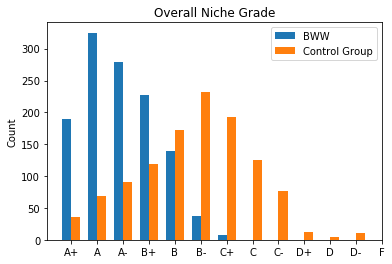

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [44]:
gradesOrder = ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F']
x = np.arange(len(gradesOrder))

def plot_category(category):
    width = 0.35 # with of the bars

    distinctOverallGradeCounts = bwwdata[category].value_counts().reindex(index=gradesOrder)
    usNicheGradesSampleCounts = usNicheGradesSample[category].value_counts().reindex(index=gradesOrder)

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, distinctOverallGradeCounts, width, label='BWW', color='#ffd200')
    rects2 = ax.bar(x + width/2, usNicheGradesSampleCounts, width, label='Control Group', color='#434348')

    ax.set_ylabel('Count')
    ax.set_title(category)
    ax.set_xlabel('Grades')
    ax.set_xticks(x)
    ax.set_xticklabels(gradesOrder)
    ax.legend(loc='upper right')

    plt.show()


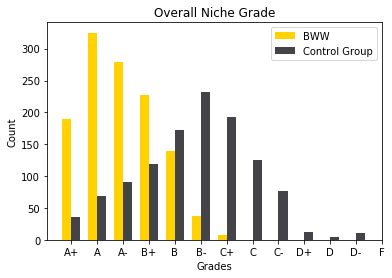

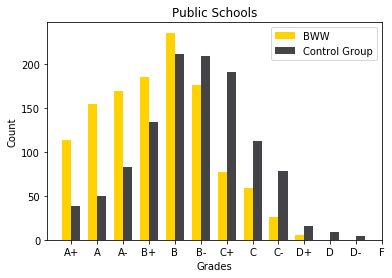

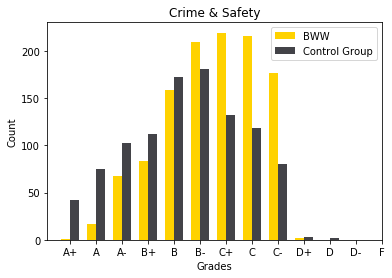

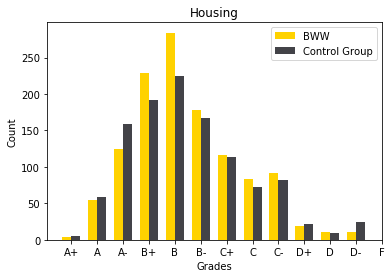

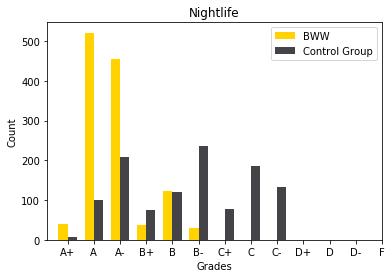

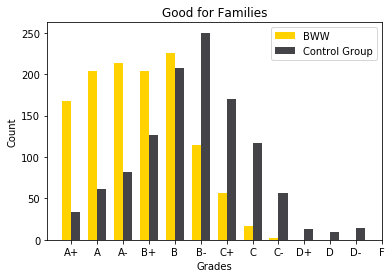

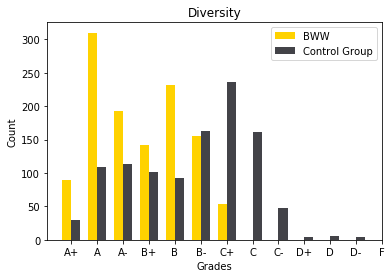

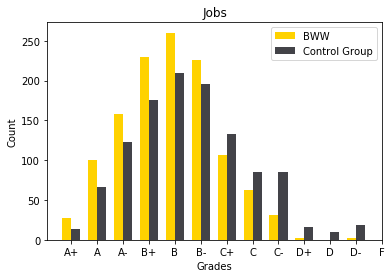

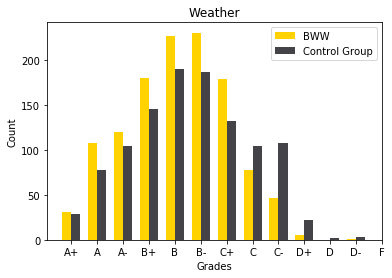

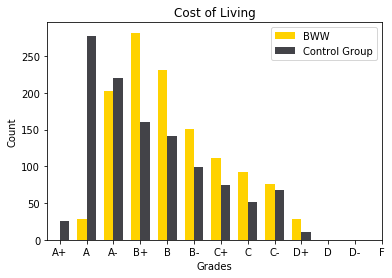

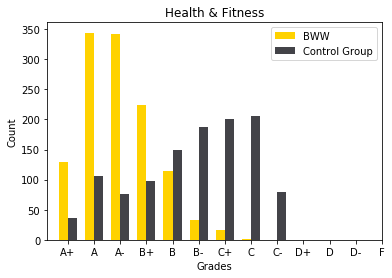

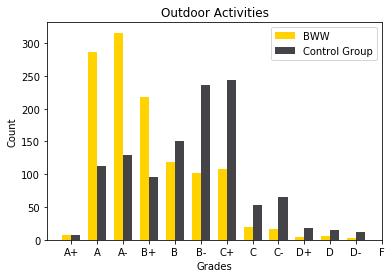

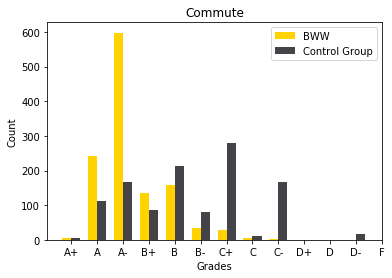

In [45]:
nicheColumns = ['Overall Niche Grade', 'Public Schools', 'Crime & Safety', 'Housing', 'Nightlife', 
              'Good for Families', 'Diversity', 'Jobs', 'Weather', 'Cost of Living', 'Health & Fitness',
              'Outdoor Activities', 'Commute']

for col in nicheColumns:
    plot_category(col)